In [324]:
#Goal: Predict the sales price for each house. 

In [325]:
#For each Id in the test set, predict the value of the SalePrice variable. 

In [326]:
#Using DecisionTreeRegressor to create a model, use the model to predict on the new feature list, assign the new prediction as a new feature.

In [327]:
#Load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sktools import GradientBoostingFeatureGenerator
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [328]:
#Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [329]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [330]:
#Drop NaN Arributes
train_df=train_df.drop(['Alley','PoolQC','Fence','FireplaceQu','MiscFeature'],axis=1)
train_df.drop(['Id'],axis=1,inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [331]:
test_df=test_df.drop(['Id','Alley','PoolQC','Fence','FireplaceQu','MiscFeature'],axis=1)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [332]:
#1. Data Preprocessing
# Handling Missing values with Mean
# training set
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())

In [333]:
#test set
test_df['LotFrontage'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())

In [334]:
# Filter Numerical Features
numerical_features  = train_df.select_dtypes(include=['int64','float64'])
numerical_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [335]:
#2. Interactions between Features

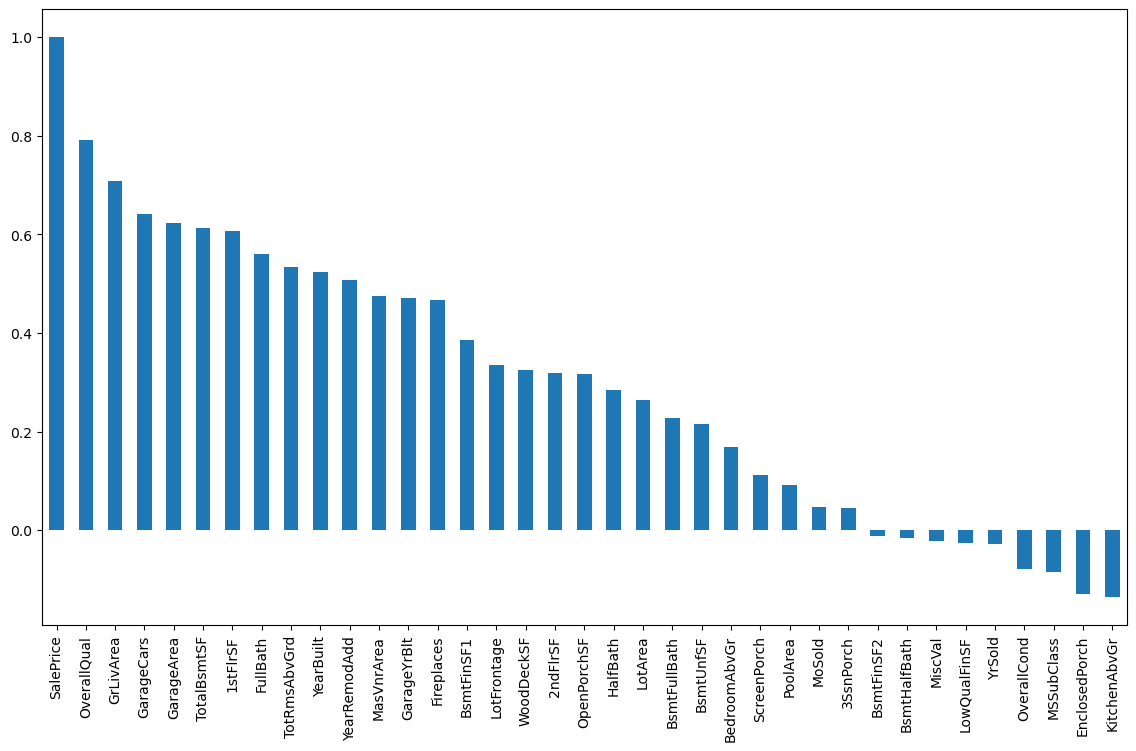

In [336]:
#Pearson Correlation
plt.figure(figsize=(14,8))
bars=train_df.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')

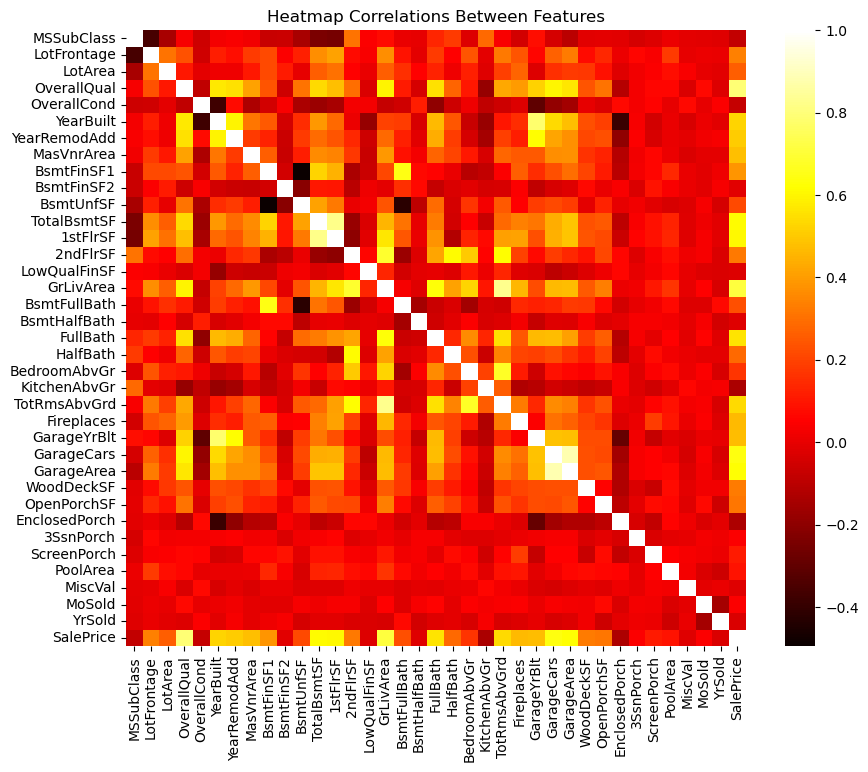

In [337]:
#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), cmap="hot")
plt.title("Heatmap Correlations Between Features")
plt.show()

In [338]:
#3. Split into test and training data
X = train_df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]
y = train_df['SalePrice']
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
449,50,50.0,6000,3,7,1948,2002,0.0,331,0,...,308,0,176,0,0,0,0,0,6,2007
409,60,85.0,10800,8,5,2007,2008,100.0,789,0,...,836,0,102,0,0,0,0,0,4,2008
398,30,60.0,8967,5,2,1920,1950,0.0,0,0,...,338,0,0,0,0,0,0,0,11,2007
932,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,788,0,191,0,0,0,0,0,3,2007
499,20,70.0,7535,5,7,1958,1985,0.0,111,279,...,297,12,285,0,0,0,0,480,6,2007


In [340]:
y_train.head()

449    120000
409    339750
398     67000
932    320000
499    120000
Name: SalePrice, dtype: int64

In [341]:
#4. Fit a baseline model --XGBoost(XGBoostRegressor)
from xgboost import XGBRegressor
regressor=XGBRegressor()
model=regressor.fit(X_train,y_train)
y_pred=model.predict(X_test)

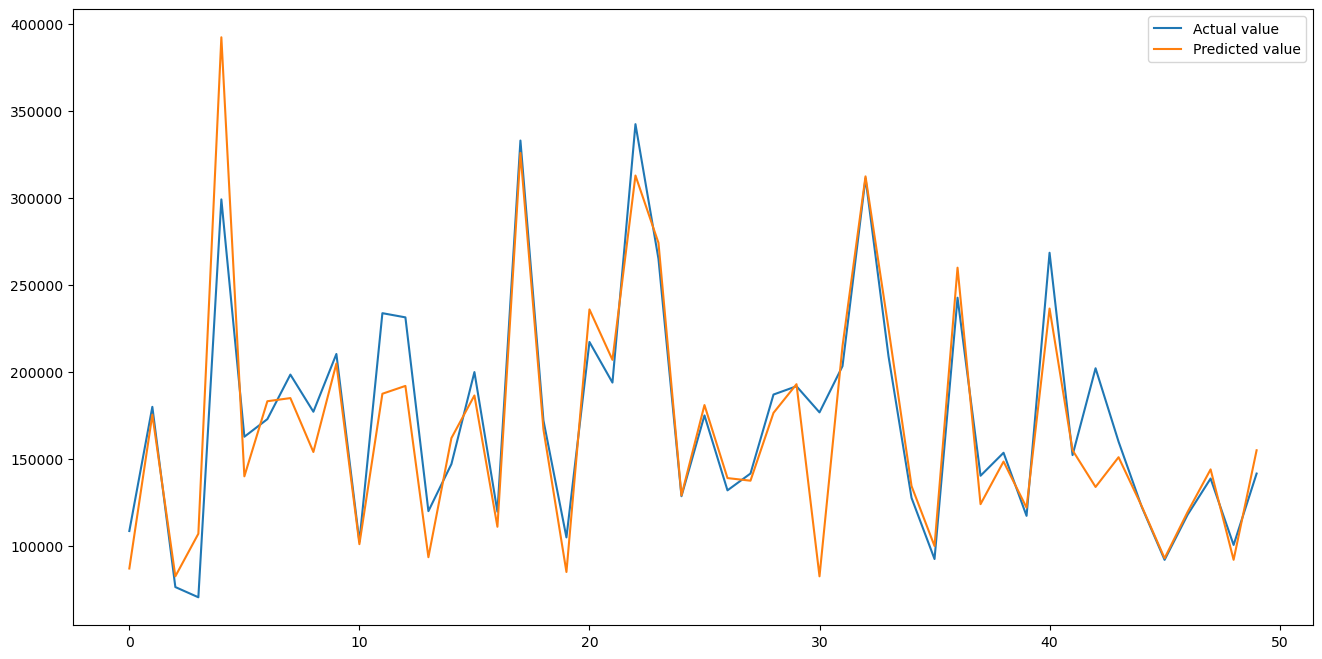

In [342]:
#Plot Predicted house price v.s. Actual house price(base model performance)
test=pd.DataFrame({'Predicted value':y_pred,'Actual value':y_test})
fig=plt.figure(figsize=(16,8))
test=test.reset_index()
test=test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [343]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8042243989969304

In [344]:
#Assess baseline model performance, get mean squared error..(aim to minimize)
print('Mean Absolute Error(MAE):',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error(MSE):',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean SquaredError(RMSE):',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error(MAE): 19123.644067494293
Mean Squared Error(MSE): 1304569830.7689064
Root Mean SquaredError(RMSE): 36118.82931060898


In [345]:
#Using Decision Tree to generate new feature

In [346]:
#Fit a DecisionTreeRegressor, and choose max-depth at 3
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor(max_depth=4,random_state=11)

In [347]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=11)

In [348]:
#Extract the tree attributes
n_nodes = DT.tree_.node_count
children_left = DT.tree_.children_left
children_right = DT.tree_.children_right
feature = DT.tree_.feature

In [349]:
#Traverse the tree to get features in each branch
def extract_path_features(node, path_features):
    if children_left[node] != children_right[node]:  # check if it's an internal node
        left_path = path_features + [feature[node]]
        right_path = path_features + [feature[node]]

        left_branch = extract_path_features(children_left[node], left_path)
        right_branch = extract_path_features(children_right[node], right_path)

        return left_branch + right_branch

    return [path_features]

branch_features = extract_path_features(0, [])

In [350]:
#Convert feature indices to feature names
branch_features_named = [[X.columns[f] for f in branch] for branch in branch_features]

In [351]:
#Each inner list represents a branch in the tree
branch_features_named

[['OverallQual', 'OverallQual', 'GrLivArea', 'YearBuilt'],
 ['OverallQual', 'OverallQual', 'GrLivArea', 'YearBuilt'],
 ['OverallQual', 'OverallQual', 'GrLivArea', 'BsmtFinSF1'],
 ['OverallQual', 'OverallQual', 'GrLivArea', 'BsmtFinSF1'],
 ['OverallQual', 'OverallQual', 'GrLivArea', 'TotalBsmtSF'],
 ['OverallQual', 'OverallQual', 'GrLivArea', 'TotalBsmtSF'],
 ['OverallQual', 'OverallQual', 'GrLivArea', 'BsmtFinSF1'],
 ['OverallQual', 'OverallQual', 'GrLivArea', 'BsmtFinSF1'],
 ['OverallQual', 'OverallQual', 'GrLivArea', '1stFlrSF'],
 ['OverallQual', 'OverallQual', 'GrLivArea', '1stFlrSF'],
 ['OverallQual', 'OverallQual', 'GrLivArea', 'GrLivArea'],
 ['OverallQual', 'OverallQual', 'GrLivArea', 'GrLivArea'],
 ['OverallQual', 'OverallQual', 'GarageCars', 'LotFrontage'],
 ['OverallQual', 'OverallQual', 'GarageCars', 'LotFrontage'],
 ['OverallQual', 'OverallQual', 'GarageCars', 'WoodDeckSF'],
 ['OverallQual', 'OverallQual', 'GarageCars', 'WoodDeckSF']]

In [352]:
#'OverallQual': Overall material and finish quality; 
#'GrLivArea':   Above grade (ground) living area square feet; 
#'GarageCars':  Size of garage in car capacity
#'YearBuilt': Original construction date
#'BsmtFinSF1': Type 1 finished square feet
#'1stFlrSF': First Floor square feet
#'LotFrontage': Linear feet of street connected to property
#'WoodDeckSF': Wood deck area in square feet

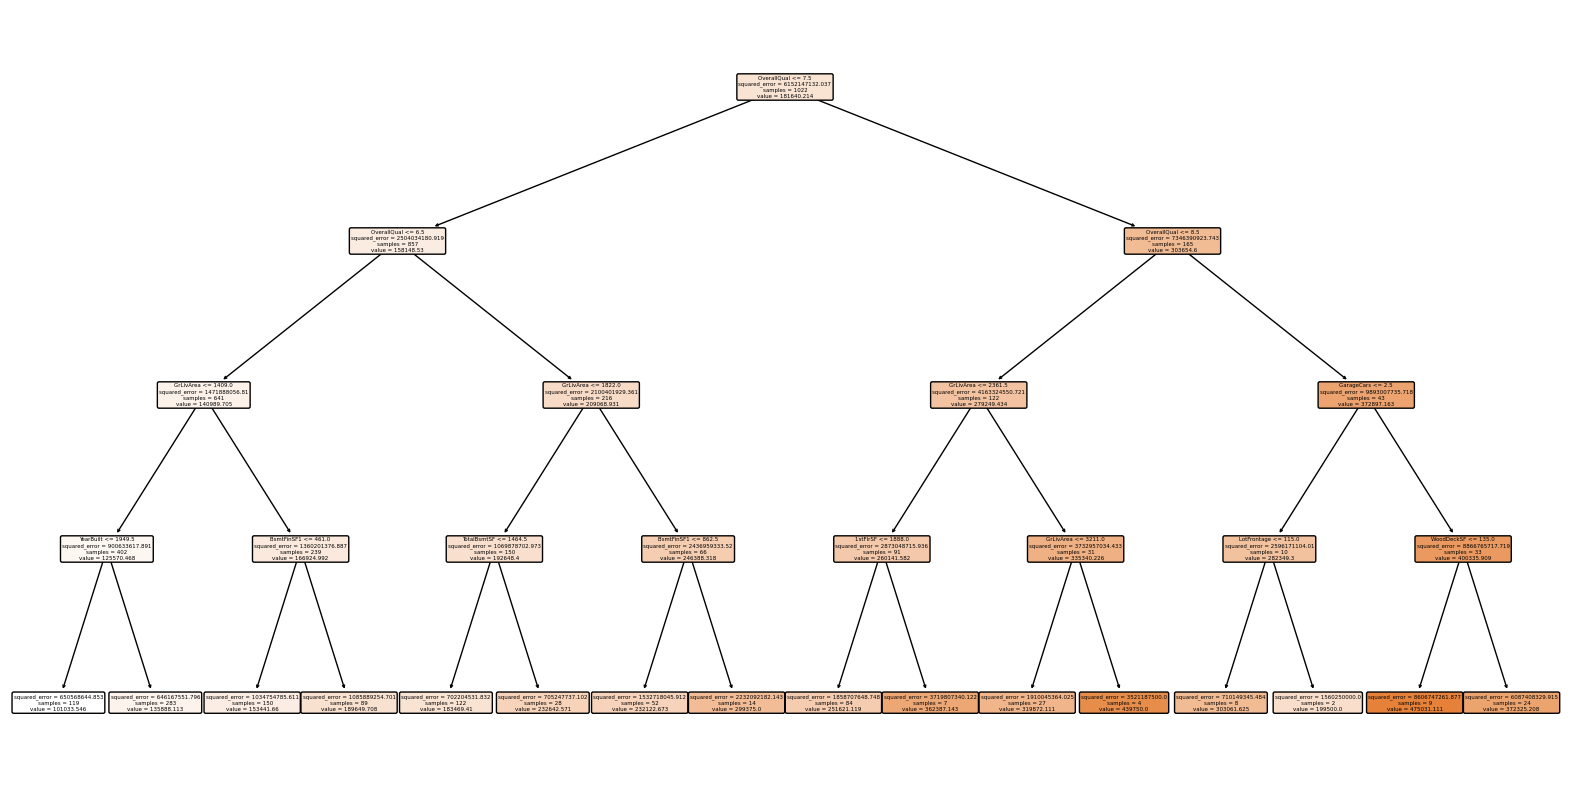

In [353]:
#Visualize this tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(DT, filled=True, feature_names=X.columns, rounded=True)
plt.show()

In [354]:
#Find interactions by computing ratio
def create_interaction_features(data, branch_features_named):
    new_features = pd.DataFrame()
    for branch in branch_features_named:
        if len(branch) == 1:
            continue
        interaction_name = "_div_".join(branch)
        # Check if all features in branch are numerical (either int or float)
        if all(pd.api.types.is_numeric_dtype(data[col].dtype) for col in branch):
            # Compute the ratio
            denominator = data[branch[1:]].prod(axis=1)
            # Replace 0 in the denominator to avoid division by zero
            denominator = denominator.replace(0, 1)
            interaction_feature = data[branch[0]] / denominator
        else:
            # For non-numerical features, concatenate as string
            interaction_feature = data[branch].astype(str).agg("_".join, axis=1)
        new_features[interaction_name] = interaction_feature
    return new_features

new_feature_data = create_interaction_features(X, branch_features_named)


In [355]:
#Concatenate interaction features with original features
X_extended = pd.concat([X, new_feature_data], axis=1)
X_extended

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscVal,MoSold,YrSold,OverallQual_div_OverallQual_div_GrLivArea_div_YearBuilt,OverallQual_div_OverallQual_div_GrLivArea_div_BsmtFinSF1,OverallQual_div_OverallQual_div_GrLivArea_div_TotalBsmtSF,OverallQual_div_OverallQual_div_GrLivArea_div_1stFlrSF,OverallQual_div_OverallQual_div_GrLivArea_div_GrLivArea,OverallQual_div_OverallQual_div_GarageCars_div_LotFrontage,OverallQual_div_OverallQual_div_GarageCars_div_WoodDeckSF
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,2,2008,2.919597e-07,8.283220e-07,6.831721e-07,6.831721e-07,3.419856e-07,0.007692,7.000000
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,5,2007,4.010086e-07,8.102178e-07,6.278867e-07,6.278867e-07,6.278867e-07,0.006250,0.001678
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,9,2008,2.798153e-07,1.152079e-06,6.085983e-07,6.085983e-07,3.134997e-07,0.007353,7.000000
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,2,2006,3.041312e-07,2.696348e-06,7.703852e-07,6.060470e-07,3.392028e-07,0.005556,7.000000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,12,2008,2.274795e-07,6.945940e-07,3.973442e-07,3.973442e-07,2.069877e-07,0.003968,0.001736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,8,2007,3.037341e-07,6.000000e+00,6.371086e-07,6.371086e-07,3.686488e-07,0.008065,6.000000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,2,2010,2.438790e-07,6.106236e-07,3.128357e-07,2.327027e-07,2.327027e-07,0.005882,0.001433
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,2500,5,2010,2.201702e-07,1.554002e-06,3.709639e-07,3.597226e-07,1.826284e-07,0.015152,7.000000
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,4,2010,4.757148e-07,1.893151e-05,8.605230e-07,8.605230e-07,8.605230e-07,0.014706,0.002732


In [356]:
#list of interaction feature names
new_feature_data_list = new_feature_data.columns.tolist()
print(new_feature_data_list)

['OverallQual_div_OverallQual_div_GrLivArea_div_YearBuilt', 'OverallQual_div_OverallQual_div_GrLivArea_div_BsmtFinSF1', 'OverallQual_div_OverallQual_div_GrLivArea_div_TotalBsmtSF', 'OverallQual_div_OverallQual_div_GrLivArea_div_1stFlrSF', 'OverallQual_div_OverallQual_div_GrLivArea_div_GrLivArea', 'OverallQual_div_OverallQual_div_GarageCars_div_LotFrontage', 'OverallQual_div_OverallQual_div_GarageCars_div_WoodDeckSF']


In [357]:
#Separate each element by the ',' to get new individual features
new_feature = [name.split(',') for name in new_feature_data_list]
print(new_feature)

[['OverallQual_div_OverallQual_div_GrLivArea_div_YearBuilt'], ['OverallQual_div_OverallQual_div_GrLivArea_div_BsmtFinSF1'], ['OverallQual_div_OverallQual_div_GrLivArea_div_TotalBsmtSF'], ['OverallQual_div_OverallQual_div_GrLivArea_div_1stFlrSF'], ['OverallQual_div_OverallQual_div_GrLivArea_div_GrLivArea'], ['OverallQual_div_OverallQual_div_GarageCars_div_LotFrontage'], ['OverallQual_div_OverallQual_div_GarageCars_div_WoodDeckSF']]


In [358]:
#    Remove the '_div_' part and duplicates from the feature names in the lists.
def clean_feature_names(new_feature):
    cleaned_lists = []
    for feature_list in new_feature:
        # Extracting the first element of each list and splitting it by '_div_'
        cleaned_features = feature_list[0].split('_div_')
        # Removing duplicates while preserving order
        cleaned_features = list(dict.fromkeys(cleaned_features))
        cleaned_lists.append(cleaned_features)
    return cleaned_lists

# Cleaning the feature names
cleaned_feature_lists = clean_feature_names(new_feature)
cleaned_feature_lists

[['OverallQual', 'GrLivArea', 'YearBuilt'],
 ['OverallQual', 'GrLivArea', 'BsmtFinSF1'],
 ['OverallQual', 'GrLivArea', 'TotalBsmtSF'],
 ['OverallQual', 'GrLivArea', '1stFlrSF'],
 ['OverallQual', 'GrLivArea'],
 ['OverallQual', 'GarageCars', 'LotFrontage'],
 ['OverallQual', 'GarageCars', 'WoodDeckSF']]

In [359]:
total_number_of_lists = len(cleaned_feature_lists)
total_number_of_lists

7

In [360]:
#Rename new features:
new_feature1=cleaned_feature_lists[0]
new_feature2=cleaned_feature_lists[1]
new_feature3=cleaned_feature_lists[2]
new_feature4=cleaned_feature_lists[3]
new_feature5=cleaned_feature_lists[4]
new_feature6=cleaned_feature_lists[5]
new_feature7=cleaned_feature_lists[6]

In [361]:
#Hyperparameter Tuning: Optimize max-depth parameters using GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={
    'max_depth':[None,2,3,4]
}
DTModel=GridSearchCV(
    DecisionTreeRegressor(random_state=11),
    cv=10,
    scoring='neg_mean_squared_error',
    param_grid=param_grid
)

In [362]:
#Pass to X_train, and using fit in DecisionTree model
DTModel.fit(X_train[new_feature1],y_train)
DTModel.fit(X_train[new_feature2],y_train)
DTModel.fit(X_train[new_feature3],y_train)
DTModel.fit(X_train[new_feature4],y_train)
DTModel.fit(X_train[new_feature5],y_train)
DTModel.fit(X_train[new_feature6],y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=11),
             param_grid={'max_depth': [None, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [363]:
#Using Predict() to predict target variable using two new features, assign back to X_train,X_test dataset

#for feature 1
X_train=X_train.assign(OverQual_Area_Year=DTModel.predict(X_train[new_feature1]))
X_test=X_test.assign(OverQual_Area_Year=DTModel.predict(X_test[new_feature1]))

/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GrLivArea
- YearBuilt
Feature names seen at fit time, yet now missing:
- GarageCars
- LotFrontage

  warnings.warn(message, FutureWarning)
/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GrLivArea
- YearBuilt
Feature names seen at fit time, yet now missing:
- GarageCars
- LotFrontage

  warnings.warn(message, FutureWarning)


In [364]:
#for feature 2
X_train=X_train.assign(OverQual_Area_Bsmt=DTModel.predict(X_train[new_feature2]))
X_test=X_test.assign(OverQual_Area_Bsmt=DTModel.predict(X_test[new_feature2]))

/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BsmtFinSF1
- GrLivArea
Feature names seen at fit time, yet now missing:
- GarageCars
- LotFrontage

  warnings.warn(message, FutureWarning)
/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BsmtFinSF1
- GrLivArea
Feature names seen at fit time, yet now missing:
- GarageCars
- LotFrontage

  warnings.warn(message, FutureWarning)


In [365]:
#for feature 3
X_train=X_train.assign(OverQual_Area_TBsmt=DTModel.predict(X_train[new_feature3]))
X_test=X_test.assign(OverQual_Area_TBsmt=DTModel.predict(X_test[new_feature3]))

/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GrLivArea
- TotalBsmtSF
Feature names seen at fit time, yet now missing:
- GarageCars
- LotFrontage

  warnings.warn(message, FutureWarning)
/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GrLivArea
- TotalBsmtSF
Feature names seen at fit time, yet now missing:
- GarageCars
- LotFrontage

  warnings.warn(message, FutureWarning)


In [366]:
#for feature 4
X_train=X_train.assign(OverQual_Area_Flr=DTModel.predict(X_train[new_feature4]))
X_test=X_test.assign(OverQual_Area_Flr=DTModel.predict(X_test[new_feature4]))

/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1stFlrSF
- GrLivArea
Feature names seen at fit time, yet now missing:
- GarageCars
- LotFrontage

  warnings.warn(message, FutureWarning)
/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1stFlrSF
- GrLivArea
Feature names seen at fit time, yet now missing:
- GarageCars
- LotFrontage

  warnings.warn(message, FutureWarning)


In [367]:
#for feature 5 -- only two, but DT expecting 3 features as input
#X_train=X_train.assign(OverQual_Area=DTModel.predict(X_train[new_feature5]))
#X_test=X_test.assign(OverQual_Area=DTModel.predict(X_test[new_feature5]))

In [368]:
#for feature 6
X_train=X_train.assign(OverQual_Car_Lot=DTModel.predict(X_train[new_feature6]))
X_test=X_test.assign(OverQual_Car_Lot=DTModel.predict(X_test[new_feature6]))

In [369]:
#for feature 7
X_train=X_train.assign(OverQual_Car_Wood=DTModel.predict(X_train[new_feature7]))
X_test=X_test.assign(OverQual_Car_Wood=DTModel.predict(X_test[new_feature7]))

/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- WoodDeckSF
Feature names seen at fit time, yet now missing:
- LotFrontage

  warnings.warn(message, FutureWarning)
/Users/yam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- WoodDeckSF
Feature names seen at fit time, yet now missing:
- LotFrontage

  warnings.warn(message, FutureWarning)


In [370]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea,MiscVal,MoSold,YrSold,OverQual_Area_Year,OverQual_Area_Bsmt,OverQual_Area_TBsmt,OverQual_Area_Flr,OverQual_Car_Lot,OverQual_Car_Wood
449,50,50.0,6000,3,7,1948,2002,0.0,331,0,...,0,0,6,2007,137780.677852,137780.677852,137780.677852,137780.677852,96707.211268,96707.211268
409,60,85.0,10800,8,5,2007,2008,100.0,789,0,...,0,0,4,2008,302090.854839,302090.854839,302090.854839,302090.854839,302090.854839,538000.000000
398,30,60.0,8967,5,2,1920,1950,0.0,0,0,...,0,0,11,2007,137780.677852,137780.677852,137780.677852,137780.677852,128840.724891,128840.724891
932,20,84.0,11670,9,5,2006,2006,302.0,0,0,...,0,0,3,2007,249875.000000,410043.064516,249875.000000,249875.000000,410043.064516,410043.064516
499,20,70.0,7535,5,7,1958,1985,0.0,111,279,...,0,480,6,2007,137780.677852,137780.677852,137780.677852,137780.677852,128840.724891,128840.724891


In [371]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea,MiscVal,MoSold,YrSold,OverQual_Area_Year,OverQual_Area_Bsmt,OverQual_Area_TBsmt,OverQual_Area_Flr,OverQual_Car_Lot,OverQual_Car_Wood
127,45,55.0,4388,5,7,1930,1950,0.0,116,0,...,0,0,6,2007,137780.677852,137780.677852,137780.677852,137780.677852,128840.724891,128840.724891
455,20,80.0,9600,7,6,1973,1973,320.0,916,0,...,0,0,9,2007,257466.333333,257466.333333,257466.333333,257466.333333,218280.865385,154488.888889
1323,30,50.0,5330,4,7,1940,1950,0.0,280,0,...,0,0,12,2009,137780.677852,137780.677852,137780.677852,137780.677852,96707.211268,96707.211268
217,70,57.0,9906,4,4,1925,1950,0.0,0,0,...,0,0,9,2006,137780.677852,137780.677852,137780.677852,137780.677852,96707.211268,96707.211268
1181,120,64.0,5587,8,5,2008,2008,186.0,1480,0,...,0,0,11,2008,302090.854839,302090.854839,302090.854839,302090.854839,262370.409091,262370.409091


In [372]:
y_train.head()

449    120000
409    339750
398     67000
932    320000
499    120000
Name: SalePrice, dtype: int64

In [373]:
y_test.head()

127      87000
455     175500
1323     82500
217     107000
1181    392500
Name: SalePrice, dtype: int64

In [374]:
#Re-fit baseline model using new feature to new X_train data, and predict new X_train data
regressor=XGBRegressor()
model=regressor.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [375]:
#Print RMSE score to see if is reduced loss function, if yes, then have better performance due to new feature
print('Mean Absolute Error(MAE):',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error(MSE):',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean SquaredError(RMSE):',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error(MAE): 18807.28407712614
Mean Squared Error(MSE): 1193076014.614751
Root Mean SquaredError(RMSE): 34540.93245143725


In [376]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8209561739858096

/var/folders/3j/bd328j896wgfz88pgbggdm640000gn/T/ipykernel_32632/290178646.py:7: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Actual value','Predicted value')
/var/folders/3j/bd328j896wgfz88pgbggdm640000gn/T/ipykernel_32632/290178646.py:7: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Actual value','Predicted value')
/var/folders/3j/bd328j896wgfz88pgbggdm640000gn/T/ipykernel_32632/290178646.py:7: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Actual val

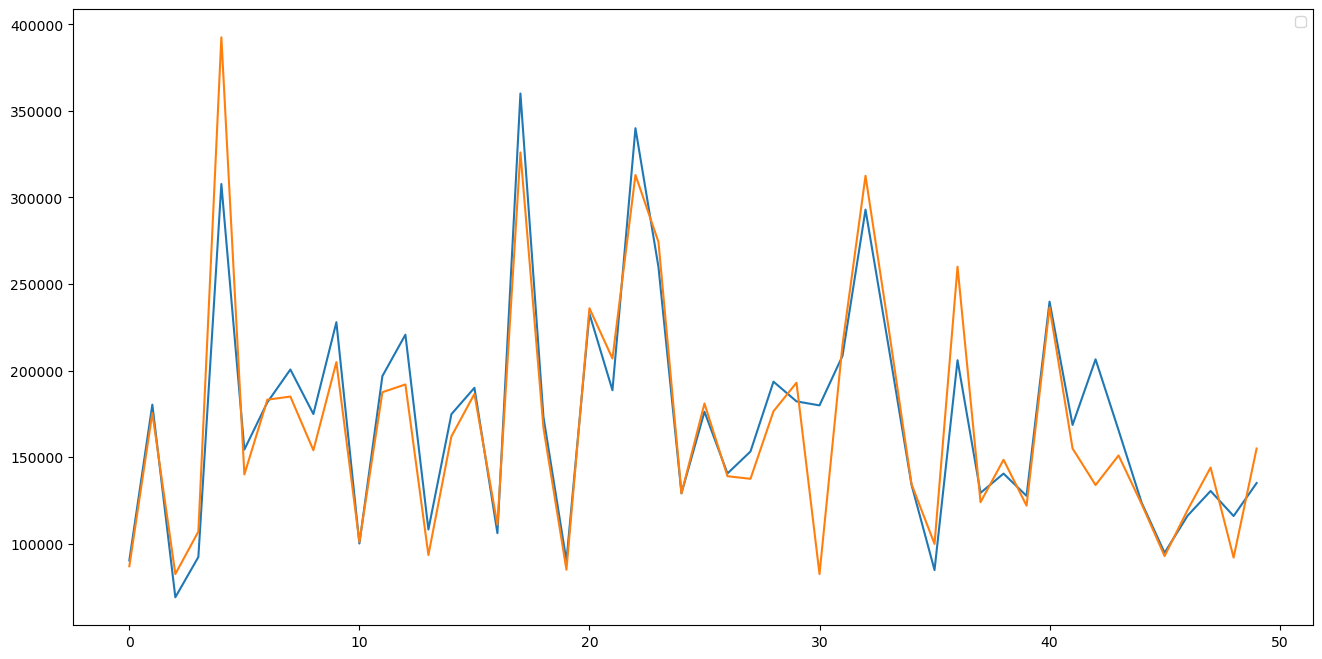

In [377]:
#Plot
test=pd.DataFrame({'Predicted value':y_pred,'Actual value':y_test})
fig=plt.figure(figsize=(16,8))
test=test.reset_index()
test=test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend('Actual value','Predicted value')